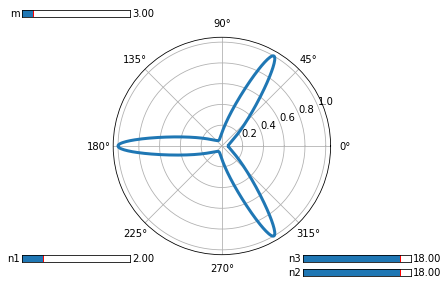

In [3]:
# 임포트
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.widgets import Slider


# SuperShape Define
def supershape_radius(phi, a, b, m, n1, n2, n3):
    theta = .25 * m * phi
    cos = np.fabs(np.cos(theta) / a)**n2
    sin = np.fabs(np.sin(theta) / b)**n3
    r = (cos + sin)**(-1. / n1)
    r /= np.max(r)
    return r


#parameter initialize
phi = np.linspace(0, 2 * np.pi, 1024)
m_init = 3
n1_init = 2
n2_init = 18
n3_init = 18

#float and slider define

fig = plt.figure()
ax = fig.add_subplot(111, polar=True)

ax_m = plt.axes([0.05, 0.95, 0.25, 0.025])
ax_n1 = plt.axes([0.05, 0.10, 0.25, 0.025])
ax_n2 = plt.axes([0.7, 0.05, 0.25, 0.025])
ax_n3 = plt.axes([0.7, 0.10, 0.25, 0.025])

slider_m = Slider(ax_m, 'm', 1, 20, valinit=m_init)
slider_n1 = Slider(ax_n1, 'n1', .1, 10, valinit=n1_init)
slider_n2 = Slider(ax_n2, 'n2', .1, 20, valinit=n2_init)
slider_n3 = Slider(ax_n3, 'n3', .1, 20, valinit=n3_init)

#Rendering
r = supershape_radius(phi, 1, 1, m_init, n1_init, n2_init, n3_init)
lines, = ax.plot(phi, r, lw=3.)


def update(val):
    r = supershape_radius(phi, 1, 1, np.floor(slider_m.val), slider_n1.val,
                          slider_n2.val, slider_n3.val)
    lines.set_ydata(r)
    fig.canvas.draw_idle()


slider_n1.on_changed(update)
slider_n2.on_changed(update)
slider_n3.on_changed(update)
slider_m.on_changed(update)

plt.show()

In [ ]:
import numpy as np
from tkinter import *
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure

def supershape_radius(phi, a, b, m, n1, n2, n3):
    theta = .25 * m * phi
    cos = np.fabs(np.cos(theta) / a)**n2
    sin = np.fabs(np.sin(theta) / b)**n3
    r = (cos + sin)**(-1. / n1)
    r /= np.max(r)
    return r

class LinearScaling(object):
    def __init__(self, src_range, dst_range):
        self.src_start, src_diff = src_range[0], src_range[1] - src_range[0]
        self.dst_start, dst_diff = dst_range[0], dst_range[1] - dst_range[0]
        self.src_to_dst_coeff = dst_diff / src_diff
        self.dst_to_src_coeff = src_diff / dst_diff
        
    def src_to_dst(self, X):
        return (X - self.src_start) * self.src_to_dst_coeff + self.dst_start
    
    def dst_to_src(self, X):
        return (X - self.dst_start) * self.dst_to_src_coeff + self.src_start
    
class SuperShapeFrame(Frame):
    def __init__(self, master = None):
        Frame.__init__(self, master)
        self.grid()
        self.m = 3
        self.n1 = 2
        self.n1_scaling = LinearScaling((.1, 20), (0, 200))
        self.n2 = 18
        self.n2_scaling = LinearScaling((.1, 20), (0, 200))
        self.n3 = 18
        self.n3_scaling = LinearScaling((.1, 20), (0, 200))
        
        self.fig = Figure((6, 6), dpi = 80)
        canvas = FigureCanvasTkAgg(self.fig, master = self)
        canvas.get_tk_widget().grid(row = 0, column=0, columnspan = 4)
        
        label = Label(self, text = 'M')
        label.grid(row = 1, column = 1)
        self.m_slider = Scale(self, from_ = 1, to = 20, orient = HORIZONTAL, command = lambda i : self.update_m())
        
        self.m_slider.grid(row = 1, column = 2)
        
        label = Label(self, text = 'N1')
        label.grid(row = 2, column = 1)
        self.n1_slider = Scale(self, from_ = 0, to = 200, orient = HORIZONTAL, command = lambda i : self.update_n1())
        self.n1_slider.grid(row = 2, column = 2)
        
        label = Label(self, text = 'N2')
        label.grid(row = 3, column = 1)
        self.n2_slider = Scale(self, from_ = 0, to = 200, orient = HORIZONTAL, command = lambda i : self.update_n2())
        self.n2_slider.grid(row = 3, column = 2)
        
        label = Label(self, text='N3')
        label.grid(row = 4, column = 1)
        self.n3_slider = Scale(self, from_ = 0, to = 200, orient = HORIZONTAL, command = lambda i : self.update_n3())
        self.n3_slider.grid(row = 4, column = 2)
        
        self.draw_figure()
        
    def update_m(self):
        self.m = self.m_slider.get()
        self.refresh_figure()
        
    def update_n1(self):
        self.n1 = self.n1_scaling.dst_to_src(self.n1_slider.get())
        self.refresh_figure()
        
    def update_n2(self):
        self.n2 = self.n2_scaling.dst_to_src(self.n2_slider.get())
        self.refresh_figure()
        
    def update_n3(self):
        self.n3 = self.n3_scaling.dst_to_src(self.n3_slider.get())
        self.refresh_figure()
        
    def refresh_figure(self):
        r = supershape_radius(self.phi, 1, 1, self.m, self.n1, self.n2, self.n3)
        self.lines.set_ydata(r)
        self.fig.canvas.draw_idle()
        
    def draw_figure(self):
        self.phi = np.linspace(0, 2 * np.pi, 1024)
        r = supershape_radius(self.phi, 1, 1, self.m, self.n1, self.n2, self.n3)
        ax = self.fig.add_subplot(111, polar = True)
        self.lines, = ax.plot(self.phi, r, lw=3.)
        self.fig.canvas.draw()
        
app = SuperShapeFrame()
app.master.title('SuperShape')
app.mainloop()

        

In [ ]:
import wx, numpy

from matplotlib.backends.backend_wxagg import FigureCanvasWxAgg
from matplotlib.figure import Figure



def supershape_radius(phi, a, b, m, n1, n2, n3):
	theta = .25 * m * phi
	cos = numpy.fabs(numpy.cos(theta) / a) ** n2
	sin = numpy.fabs(numpy.sin(theta) / b) ** n3
	r = (cos + sin) ** (-1. / n1)
	r /= numpy.max(r)
	return r



class SuperShapeFrame(wx.Frame):
	def __init__(self, parent, id, title):
		wx.Frame.__init__(self, parent, id, title,
		                  style = wx.DEFAULT_FRAME_STYLE ^ wx.RESIZE_BORDER,
		                  size = (480, 480))
		self.fig = Figure((6, 6), dpi = 80)

		self.panel = wx.Panel(self, -1)
		sizer = wx.BoxSizer(wx.VERTICAL)
		sizer.Add(FigureCanvasWxAgg(self.panel, -1, self.fig), 1)
		self.panel.SetSizer(sizer)

		self.draw_figure()

	def draw_figure(self):
		phi = numpy.linspace(0, 2 * numpy.pi, 1024)
		r = supershape_radius(phi, 1, 1, 3, 2, 18, 18)
		ax = self.fig.add_subplot(111, polar = True)
		ax.plot(phi, r, lw = 3.)

		self.fig.canvas.draw()



app = wx.App(redirect = True)
top = SuperShapeFrame(None, -1, 'SuperShape')
top.Show()
app.MainLoop()
